## Classification - Personal Loan Dataset

This case is about a bank which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. 

In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

**Dataset Description**:

| Feature | Description |
| --- | --- |
| ID | Customer ID |
| Age | Customer's age in completed years |
| Experience | # years of professional experience |
| Income | Annual income of the customer (In 1,000 dollars) |
| ZIPcode | Home address ZIP code |
| Family | Family size of the customer |
| CCAvg | Average monthly spending on credit cards (In 1,000 dollars) |
| Education | Education level: 1: undergrad; 2: Graduate; 3: Advance/Professional |
| Mortgage | Mortgage Value of house mortgage if any. (In 1,000 dollars) |
| Securities Acct | Does the customer have a securities account with the bank? |
| CD Account | Does the customer have a certifcate of deposit (CD) account with the bank? |
| Online | Does the customer use internet bank facilities? |
| CreditCard | Does the customer use a credit card issued by the UniversalBank? |
| **Personal loan** | **Did this customer accept the personal loan offered in he last campaign? 1: yes; 0: no (target variable)** | 

**The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**
___

The dataset is available at the path `datasets` from the current directory.

#### Import all the required packages and classes

In [489]:
import numpy as np
import pandas as pd

# Preprocessing
## Read the file

In [490]:
df=pd.read_csv('UnivBank.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0.0,#,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0.0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0.0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0.0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0.0,0,1,0


# Preprocessing

In [491]:
sub_id=df['ID']

In [492]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    2
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   object 
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  4998 non-null   float64
 11  CD Account          5000 non-null   object 
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 547.0+ KB


In [494]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               348
Personal Loan            2
Securities Account       2
CD Account               3
Online                   2
CreditCard               2
dtype: int64

In [495]:
chec_coun= df['Personal Loan'].value_counts()

<AxesSubplot:ylabel='Personal Loan'>

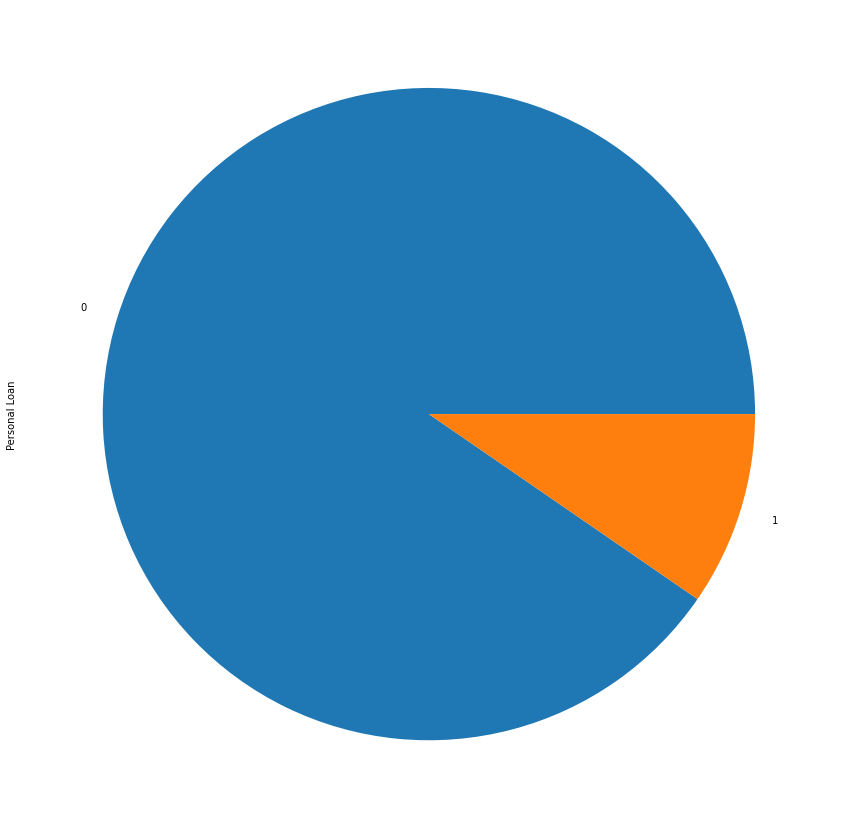

In [496]:
chec_coun.plot.pie(y='mass', figsize=(15, 15))

In [497]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

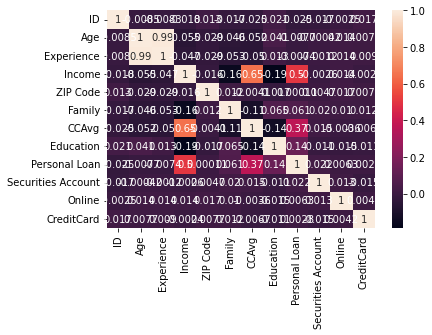

In [498]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

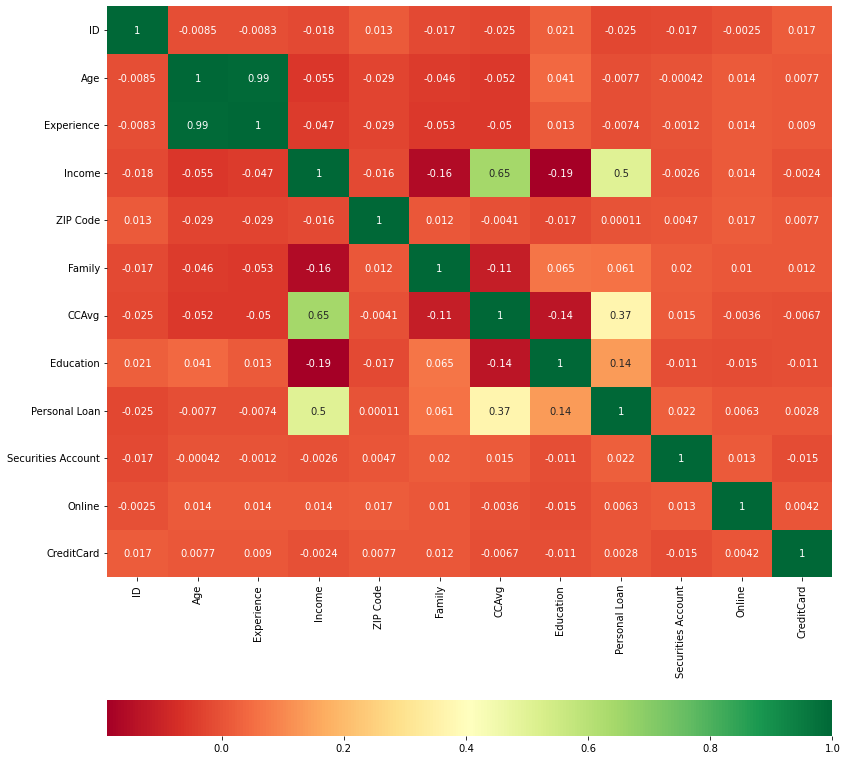

In [499]:
corre_df = df.corr(method='pearson')
plt.figure(figsize=(13,15))
sns.heatmap(corre_df, cmap='RdYlGn',annot=True,cbar_kws={"orientation": "horizontal"})

C:\Users\balakrishna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

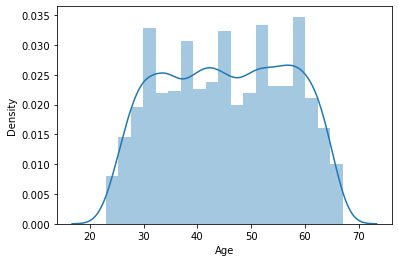

In [500]:
sns.distplot(df['Age'])

C:\Users\balakrishna\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

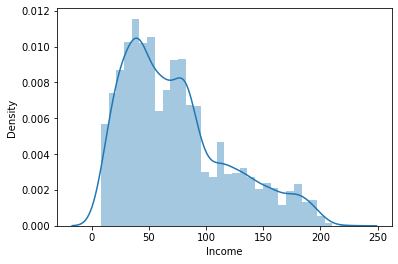

In [501]:
sns.distplot(df['Income'])

In [502]:
cou_age=df.Age.value_counts().index
cou_age=pd.DataFrame(cou_age)
coun_age=df.Age.value_counts().values
coun_age=pd.DataFrame(coun_age)

In [503]:
df_coun_age=pd.concat((coun_age,cou_age),axis=1)
df_coun_age

,0,0
0,151,35
1,149,43
2,145,52
3,143,54
4,143,58
5,138,50
6,136,41
7,136,30
8,135,56
9,134,34


In [504]:
df_coun_age.columns=['No of Customers','Age']
df_coun_age

,No of Customers,Age
0,151,35
1,149,43
2,145,52
3,143,54
4,143,58
5,138,50
6,136,41
7,136,30
8,135,56
9,134,34


In [505]:
Cou_inc=df.Income.value_counts().values
Cou_inc=pd.DataFrame(Cou_inc)
Cou_inc

,0
0,85
1,84
2,83
3,82
4,81
...,...
157,2
158,2
159,2
160,1


In [506]:
Coun_inc=df.Income.value_counts().index
Coun_inc=pd.DataFrame(Coun_inc)
Coun_inc

,0
0,44
1,38
2,81
3,41
4,39
...,...
157,202
158,203
159,189
160,224


In [507]:
df_coun_inco=pd.concat((Cou_inc,Coun_inc),axis=1)
df_coun_inco.columns=['No of Customers','Income']
df_coun_inco

,No of Customers,Income
0,85,44
1,84,38
2,83,81
3,82,41
4,81,39
...,...,...
157,2,202
158,2,203
159,2,189
160,1,224


In [508]:
Age_Inco=pd.merge(df_coun_age,df_coun_inco,on=['No of Customers'],how='inner')
Age_Inco

,No of Customers,Age,Income
0,78,64,40
1,78,26,40
2,53,25,18
3,53,25,34
4,53,25,79
5,53,25,59
6,28,24,98
7,24,66,122
8,24,66,101
9,24,66,141


<AxesSubplot:xlabel='Age', ylabel='Income'>

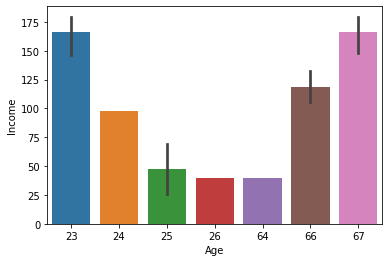

In [509]:
sns.barplot(x='Age',y='Income',data=Age_Inco)

In [510]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [511]:
df.dropna(how='any',inplace=True)

In [512]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [513]:
df_cate=['Family','Education','Securities Account', 'CD Account','Online', 'CreditCard']

In [514]:
df[df_cate]=df[df_cate].astype('category')

In [515]:
df[df_cate]

,Family,Education,Securities Account,CD Account,Online,CreditCard
0,4,1,1.0,0,0,0
1,3,1,1.0,0,0,0
2,1,1,0.0,0,0,0
3,1,2,0.0,#,0,0
4,4,2,0.0,0,0,1
...,...,...,...,...,...,...
4995,1,3,0.0,0,1,0
4996,4,1,0.0,0,1,0
4997,2,3,0.0,0,0,0
4998,3,2,0.0,0,1,0


In [516]:
df_num=df.select_dtypes(include=['float64','int64'])
df_num

,Age,Experience,Income,CCAvg,Personal Loan
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0
3,35,9,100,2.7,0
4,35,8,45,1.0,0
...,...,...,...,...,...
4995,29,3,40,1.9,0
4996,30,4,15,0.4,0
4997,63,39,24,0.3,0
4998,65,40,49,0.5,0


In [517]:
df_num.dtypes

Age                int64
Experience         int64
Income             int64
CCAvg            float64
Personal Loan      int64
dtype: object

In [518]:
df.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                object
Personal Loan            int64
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [519]:
y=df['Personal Loan']

In [520]:
x=df.drop(['Personal Loan'],axis=1)

In [521]:
x.shape

(4998, 11)

In [522]:
y.shape

(4998,)

In [523]:
from sklearn.model_selection import train_test_split

In [524]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [525]:
from sklearn.preprocessing import OneHotEncoder

In [526]:
on_hot=OneHotEncoder(handle_unknown='ignore')

In [527]:
on_hot.fit(x_train[df_cate])

OneHotEncoder(handle_unknown='ignore')

In [528]:
on_hot_trans_train=on_hot.transform(x_train[df_cate]).toarray()
on_hot_trans_test=on_hot.transform(x_test[df_cate]).toarray()

In [529]:
from sklearn.preprocessing import StandardScaler

In [530]:
scale=StandardScaler()

In [531]:
scal_nume=['Age','Experience', 'Income', 'CCAvg']

In [532]:
scale.fit(x_train[scal_nume])

StandardScaler()

In [533]:
sca_train=scale.transform(x_train[scal_nume])
sca_test=scale.transform(x_test[scal_nume]) # co_tr=np.concatenate((on_tr,st_tr),axis=1)

In [534]:
Con_one_sca_train=np.concatenate((on_hot_trans_train,sca_train),axis=1)

In [535]:
Con_one_sca_test=np.concatenate((on_hot_trans_test,sca_test),axis=1)

In [536]:
x_train.shape

(3498, 11)

In [537]:
from sklearn.linear_model import LogisticRegression

In [538]:
Log_re=LogisticRegression()

In [539]:
Log_re.fit(Con_one_sca_train,y_train)

LogisticRegression()

In [540]:
Log_pre_train=Log_re.predict(Con_one_sca_train)
Log_pre_test=Log_re.predict(Con_one_sca_test)

In [541]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score,f1_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))  
    print('F1 Score:\n',f1_score(act,pred))

In [542]:
model_train=evaluate_model(y_train,Log_pre_train)
model_test=evaluate_model(y_test,Log_pre_test)

Confusion Matrix 
 [[3113   31]
 [ 108  246]]
Accurcay :  0.9602630074328188
Recall   :  0.6949152542372882
Precision:  0.8880866425992779
F1 Score:
 0.779714738510301
Confusion Matrix 
 [[1361   13]
 [  43   83]]
Accurcay :  0.9626666666666667
Recall   :  0.6587301587301587
Precision:  0.8645833333333334
F1 Score:
 0.7477477477477478


In [543]:
Log_tr=[0.9602630074328188
,0.6949152542372882
,0.8880866425992779
, 0.779714738510301]
Log_te=[0.9626666666666667
,0.6587301587301587
,0.8645833333333334
,0.7477477477477478]

In [544]:
Prediction=np.concatenate([Log_pre_train,Log_pre_test])
Prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [545]:
Prediction.shape

(4998,)

In [546]:
sub_id.shape

(5000,)

In [547]:
Fin_pre=sub_id.drop(sub_id.tail(2).index,inplace=True)

In [548]:
submit_predict=pd.DataFrame({'ID':Fin_pre,'Personal_Loan':Prediction})

In [549]:
submit_predict.to_csv('submit_predict.csv')

In [550]:
from sklearn.tree import DecisionTreeClassifier

In [551]:
Dec_tre=DecisionTreeClassifier()
Dec_tre.fit(Con_one_sca_train,y_train)

DecisionTreeClassifier()

In [552]:
Dec_pre_train=Dec_tre.predict(Con_one_sca_train)
Dec_pre_test=Dec_tre.predict(Con_one_sca_test)

In [553]:
Dec_model_train=evaluate_model(y_train,Dec_pre_train)
Dec_model_test=evaluate_model(y_test,Dec_pre_test)

Confusion Matrix 
 [[3144    0]
 [   0  354]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1 Score:
 1.0
Confusion Matrix 
 [[1361   13]
 [   9  117]]
Accurcay :  0.9853333333333333
Recall   :  0.9285714285714286
Precision:  0.9
F1 Score:
 0.9140625


In [554]:
Dec_tr=[1.0,1.0,1.0,1.0]
Dec_te=[0.984
,0.9206349206349206
,0.8923076923076924
,0.90625]

In [555]:
from sklearn.ensemble import RandomForestClassifier

In [556]:
Ran_for=RandomForestClassifier()

In [557]:
Ran_for.fit(Con_one_sca_train,y_train)

RandomForestClassifier()

In [558]:
Ran_pre_train=Ran_for.predict(Con_one_sca_train)
Ran_pre_test=Ran_for.predict(Con_one_sca_test)

In [559]:
Ran_model_train=evaluate_model(y_train,Ran_pre_train)
Ran_model_test=evaluate_model(y_test,Ran_pre_test)

Confusion Matrix 
 [[3144    0]
 [   0  354]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
F1 Score:
 1.0
Confusion Matrix 
 [[1370    4]
 [  13  113]]
Accurcay :  0.9886666666666667
Recall   :  0.8968253968253969
Precision:  0.9658119658119658
F1 Score:
 0.9300411522633745


In [560]:
Ran_tr=[1.0,1.0,1.0,1]
Ran_te=[0.988
,0.8968253968253969
,0.9576271186440678
,0.926229508196721]

In [561]:
df_bank_accuracy=pd.DataFrame({'LogisticRe_train':Log_tr,'LogisticRe_test':Log_te,
                               'DecisionTreeClas_train':Dec_tr,'DecisionTreeClas_test':Dec_te,
                              'Random_Forest_train':Ran_tr,'Random_Fores_test':Ran_te})
df_bank_accuracy

,LogisticRe_train,LogisticRe_test,DecisionTreeClas_train,DecisionTreeClas_test,Random_Forest_train,Random_Fores_test
0,0.960263,0.962667,1.0,0.984000,1.0,0.988000
1,0.694915,0.658730,1.0,0.920635,1.0,0.896825
2,0.888087,0.864583,1.0,0.892308,1.0,0.957627
3,0.779715,0.747748,1.0,0.906250,1.0,0.926230
